In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
#display(HTML("<style>.container { font-weight: bold !important;}</style>"))
#display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
# plt.rcParams['figure.figsize'] = [10, 6]

# 분류(Classfication)

- 학습데이터로 주어진 데이터의 피처와 레이블값(결정값, 클래스값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고 이렇게 생성된 모델에 새로운 데이터값이 주어졌을 때 미지의 값을 예측한다.


    - K Nearest Neighbor : 근접 거리를 기준으로 하는 최소 근접 알고리즘 
    - Ensemble : 서로 다른 또는 같은 머신러닝 알고리즘을 결합하는 알고리즘 
    - Logistic Regression : 독립변수와 종속변수의 선형 관계성에 기반
    - SVM(support Vector Machine) : 개별 클래스간의 최대 분류 마진이용 
    - Decision Tree :  트리기반 분류 규칙의 알고리즘 

# 결정트리 

- 스무고개 형태로 질문을 하나씩 던져서 정답을 맞추어 나간다. 
- sklearn의 DecisionTreeClassifier 클래스에서 제공
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만든다. (If-Else 기반 규칙)
- 쉽고 직관적이다. 데이타의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다. 
- 단점은 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의  크기를 사전에 제한하는 튜닝이 필요하다. 
- GBM, XGBoodt, LightGBM과 같은 앙상블 학습기의 기반이 된다.

<img src='https://upload.wikimedia.org/wikipedia/commons/f/fe/CART_tree_titanic_survivors_KOR.png' width="50%">

## 결정트리에 사용되는 Terms

- 결정트리 알고리즘 원리 
    - 결정트리는 부모노드와 자식노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다. 
    - 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드를 분할한다. 


- 불순도(impurity)
    - 결정트리가 최적의 질문을 찾기 위한 기준. 
    - 노드에서 데이터를 분할하는 기준을 정한다. 
    - 불순도 기준으로 criterion 파라미터를 사용하며 gini, entropy 가 있다. 
    - 기본값은 gini 
    - criterion : {"gini", "entropy"}, default="gini"


- 지니 불순도 
    - 경제학 용어 코라도 지니의 이름에서 딴 지니계수에서 유래 
    - 다양성을 계산하는 방법
    - 데이타의 불평등이 높을수록 1에 가깝다.
    - 1 - (음성클래스비율의제곱 + 양성클래스비율의제곱)
    - 지니불순도가 0이면 순수 노드라고 한다. 
    - 0이 가장 평등. 1로 갈수록 불평등.

    
    
- 엔트로피 불순도 
     - 지니 불순도와 같이 노드의 클래스 비율을 사용하지만 제곱이 아닌 밑이 2인 로그를 사용하여 곱한다. 


- 정보 이득(Information Gain) 
    - 부모와 자식 노드사이의 불순도 차이 
    - 엔트로피 개념 기반. 엔트로피는 주어진 데이터 집합의 혼합도
    - 정보이득 지수는 1-엔트로피지수 
  

#### 결정트리 구성 
- 루트노드 
- 규칙노드 : 규칙조건 
- 리프 노드 : 결정된 분류값 





## 결정트리 주요 하이퍼파라미터 

max_depth 
- 트리의 최대 깊이. 

max_features
- 최적의 분할을 위해 고려할 최대 피처 갯수 

min_samples_split 
- 노드를 분할하기 위한 최소한의 샘플 데이터수. 디폴트는 2이고 작게 설정할 수록 분할되는 노드가 많아져 과적합 가능성이 증가한다. 

min_samples_leaf
- 말단노드(Leaf)가 되기위한 최소한의 샘플 데이터 수 

max_leaf_nodes 
- 말단 노드의 최대 개수 


## Feature 선택 중요도 
- DecisionClassifier 객체의 feature_importances_


# 결정 트리 모델의 시각화

- 붓꽃 데이타셋 이용 
- plot_tree => 시각화 

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
#데이터셋 준비
iris_data = load_iris()
print(iris_data.data)
print('='*50)
print(iris_data.target)
print('='*50)
print(iris_data.data.shape)

#학습용, 테스터용 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.3,  random_state=11, stratify=iris_data.target)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
#모델 생성
model_dt = DecisionTreeClassifier(random_state=11)

model_dt.fit(X_train , y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

### plot_tree

- graphviz 보다 편리 
- 결정트리 모델을 트리 형태로 표시 
- sklearn.tree 에서 지원 

plot_tree(모델명)

In [7]:
from sklearn.tree import plot_tree

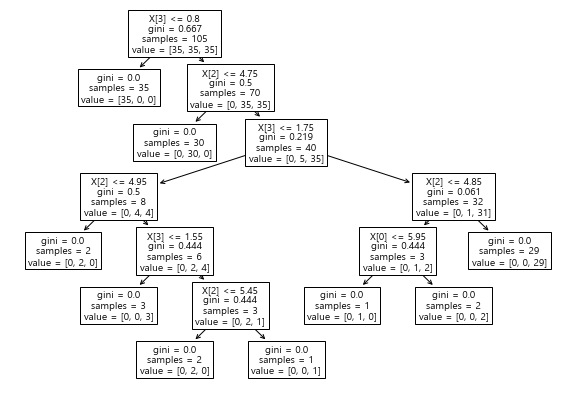

In [8]:
#트리 시각화
plt.figure(figsize=(10,7))

#트리 생성
plot_tree(model_dt)

#트리 그림 저장
plt.savefig('output/iris_tree1.png')
plt.show()

In [9]:
ls output\*.png

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: E070-A7AC

 C:\numpy\data\output 디렉터리

2021-12-01  오후 02:17            62,539 fig4.png
2021-12-07  오후 02:43            38,396 iris_tree1.png
2021-12-02  오후 02:32            40,865 tip_and_total_bill.png
2021-12-02  오후 02:32            23,119 tip_and_total_bill_and_size.png
               4개 파일             164,919 바이트
               0개 디렉터리  454,503,985,152 바이트 남음


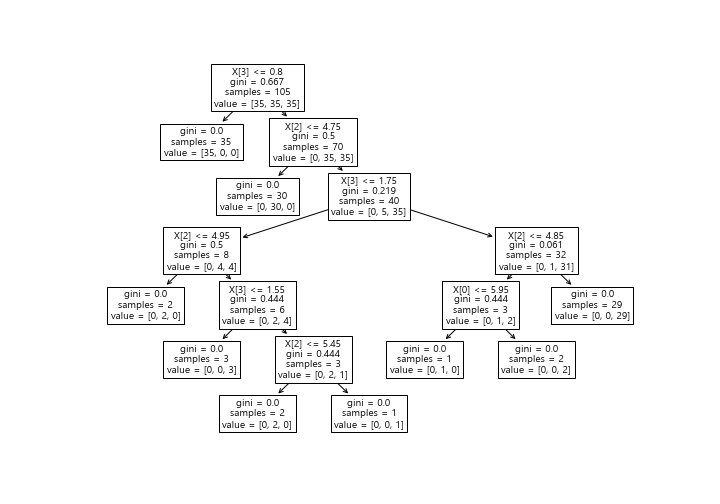

In [10]:
#코드셀에서 이미지 삽입
from IPython.display import Image

Image(filename = 'output//iris_tree1.png')

### 세부 속성 제어 
- plot_tree(모델명, max_depth=n, filled=True, feature_names=컬럼명리스트)
- max_depth 트리의 깊이
- filled=True 클래스에 맞게 색상화 
- feature_names = 리스트 매개변수에 특성의 이름을 전달
- class_names = 리스트. 타겟 클래스

In [11]:
# 라벨명
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
# 컬럼명
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

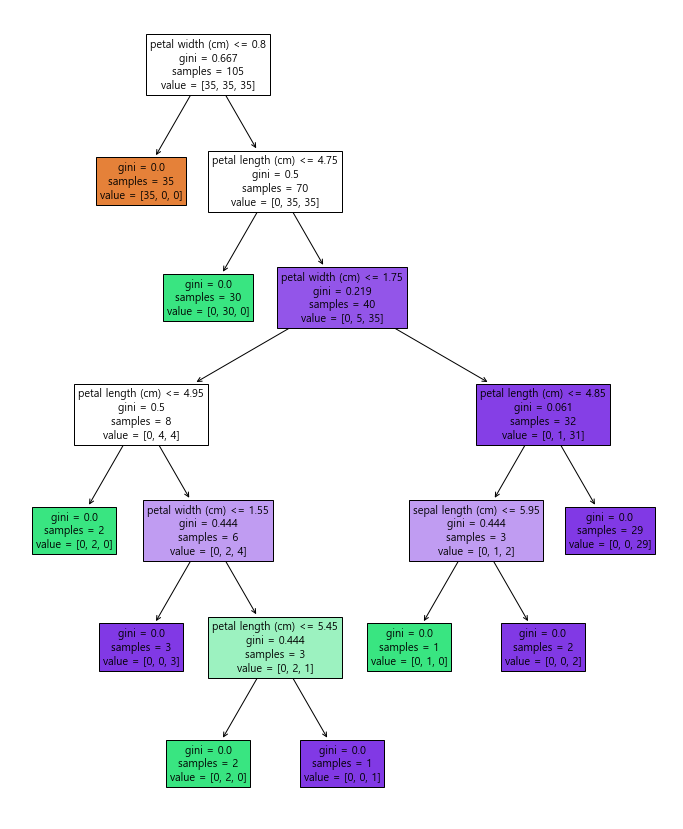

In [14]:
plt.figure(figsize=(12,15))

plot_tree(model_dt, max_depth=8, filled=True, feature_names=iris_data.feature_names)
plt.savefig('output/iris_tree3.png')
plt.show()
#색상 짙을수록 분리 완료된 것

In [15]:
#데이터프레임화(전체)
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_iris['label'] = iris_data.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
#X 학습용 + y
X_train_df = pd.DataFrame(data=X_train, columns=iris_data.feature_names) 
X_train_df['label'] = y_train
X_train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.4,3.9,1.7,0.4,0
1,5.0,3.3,1.4,0.2,0
2,4.4,2.9,1.4,0.2,0
3,6.1,2.8,4.0,1.3,1
4,5.7,2.8,4.5,1.3,1


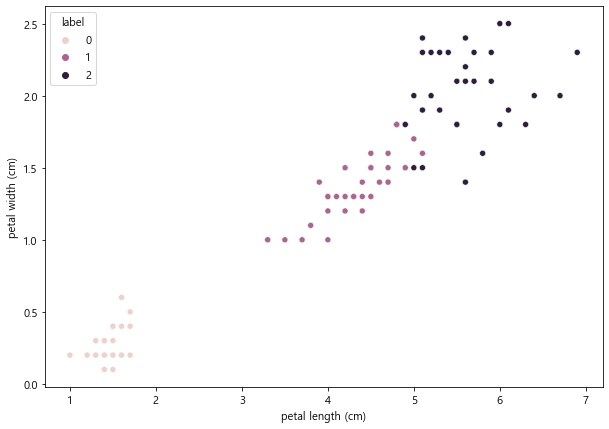

In [17]:
#학습용 데이터 시각화
plt.figure(figsize=(10,7))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='label', data=X_train_df);

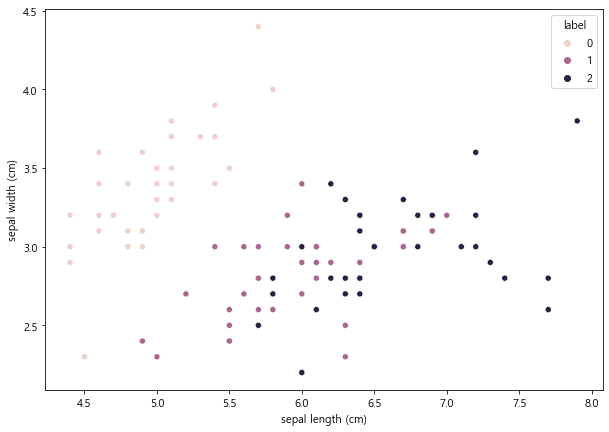

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='label', data=X_train_df);

### 가지치기

- 결정트리의 하이퍼파라미터를 지정하여 트리를 제한한다. 
- 시간 단축 및 과적합 방지 

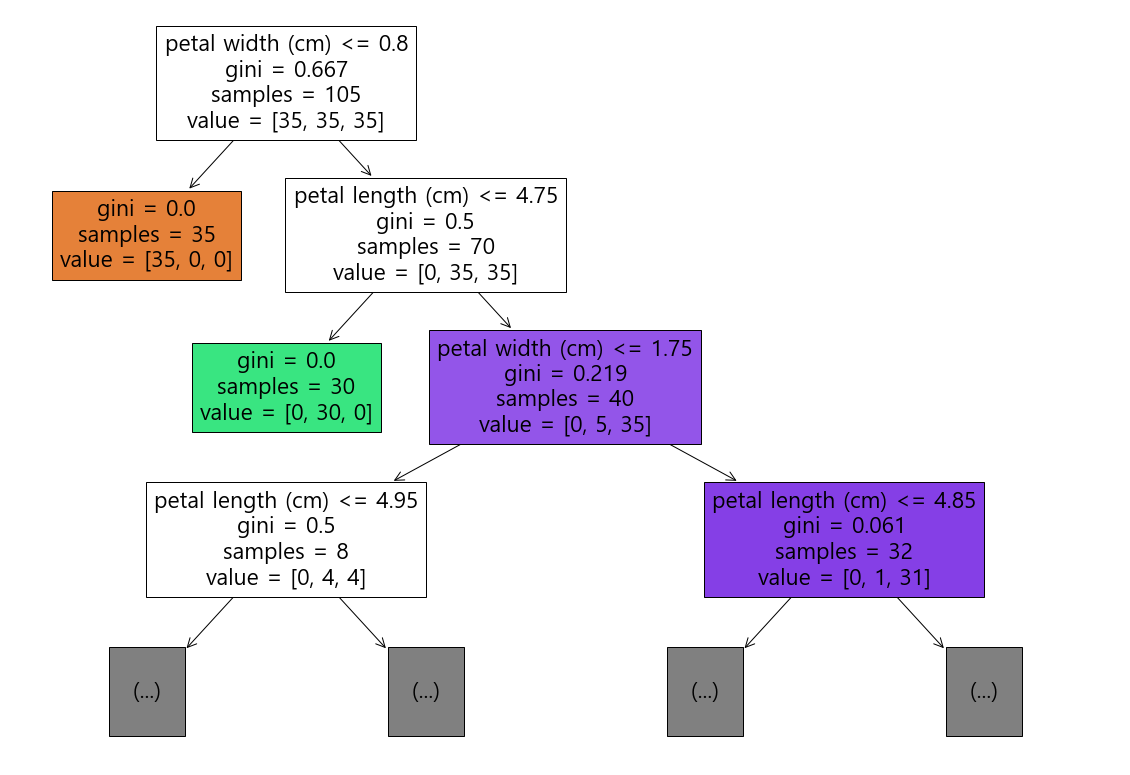

In [19]:
plt.figure(figsize=(20,14))
plot_tree(model_dt, max_depth=3, filled=True, feature_names=iris_data.feature_names)
plt.savefig('output/iris_tree3.png')
plt.show()

### 중요 속성

- feature_importances_

In [20]:
print(dir(model_dt))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_X_predict', '_validate_data', 'apply', 'ccp_alpha', 'class_weight', 'classes_', 'cost_complexity_pruning_path', 'criterion', 'decision_path', 'feature_importances_', 'fit', 'get_depth', 'get_n_leaves', 'get_params', 'max_depth', 'max_features', 'max_features_', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_classes_', 'n_featu

In [21]:
model_dt.feature_importances_

array([0.01904762, 0.        , 0.42172619, 0.55922619])

In [22]:
#어떤 컬럼이 제일 중요도가 높을까?
for name, value in zip(iris_data.feature_names , model_dt.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.019
sepal width (cm) : 0.000
petal length (cm) : 0.422
petal width (cm) : 0.559


<AxesSubplot:>

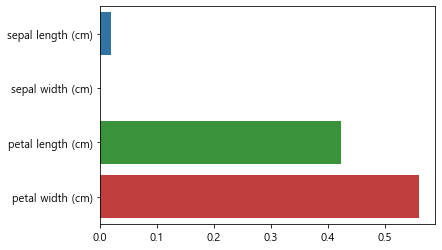

In [23]:
#피처 중요도 시각화
sns.barplot(x=model_dt.feature_importances_ , y=iris_data.feature_names)

In [24]:
from sklearn.metrics import classification_report

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test , model_dt.predict(X_test)))
print(accuracy_score(y_train , model_dt.predict(X_train)))

0.9777777777777777
1.0


In [26]:
print(classification_report(y_test, model_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
model_dt.get_params()

### 그리드서치 적용 

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 4, 6, 8 ,10, 12, 16 ,20, 24]
}


grid_cv = GridSearchCV(model_dt, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.9238
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6}


In [28]:
model_dt2 = DecisionTreeClassifier(max_depth=6)
model_dt2.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=6)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_dt2.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model_dt2.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

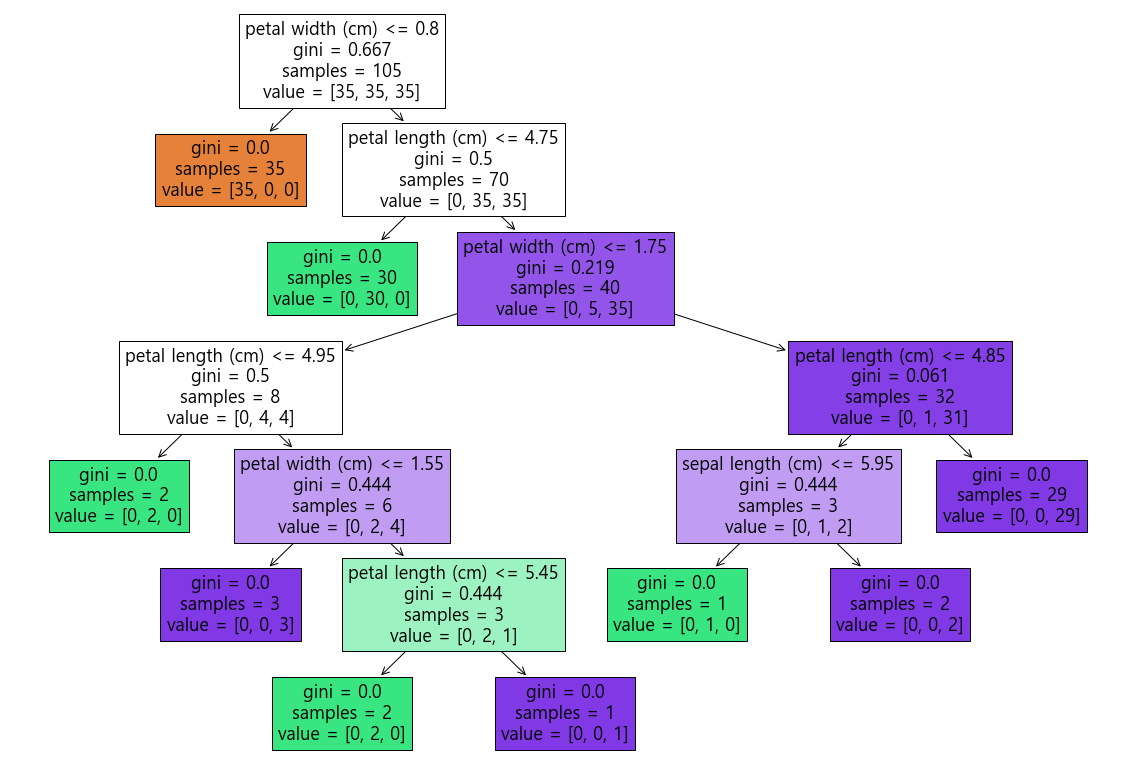

In [31]:
plt.figure(figsize=(20,14))
plot_tree(model_dt2, max_depth=8, filled=True, feature_names=iris_data.feature_names)
plt.savefig('output/iris_tree5.png')
plt.show()

In [ ]:
print(dir(grid_cv))

In [ ]:
max_depths = [ 4, 6, 8 ,10, 12, 16 ,20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

In [ ]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


In [ ]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))